In [ ]:
import numpy as np
import pandas as pd

#initialize the reproducible random generator
rng=np.random.default_rng(42)

#generate 50 random value for each column
Study_Hours=rng.integers(1,10,size=50) #from 1 to 9
Attendance=rng.integers(50,101,size=50) #from 50 to 100

#define Pass column using simple rule
Pass=((Study_Hours*10+Attendance)>120).astype(int)

#create DataFrame
df=pd.DataFrame({'Study_Hours':Study_Hours,'Attendance':Attendance,'Pass':Pass})
df

,Study_Hours,Attendance,Pass
0,1,88,0
1,7,59,1
2,6,68,1
3,4,73,0
4,4,75,0
5,8,52,1
6,1,77,0
7,7,57,1
8,2,87,0
9,1,84,0


In [ ]:
#Summary Stats
df.describe()

,Study_Hours,Attendance,Pass
count,50.000000,50.000000,50.000000
mean,5.320000,75.540000,0.640000
std,2.559018,13.684805,0.484873
min,1.000000,52.000000,0.000000
25%,4.000000,65.250000,0.000000
50%,5.000000,73.500000,1.000000
75%,7.750000,87.000000,1.000000
max,9.000000,99.000000,1.000000


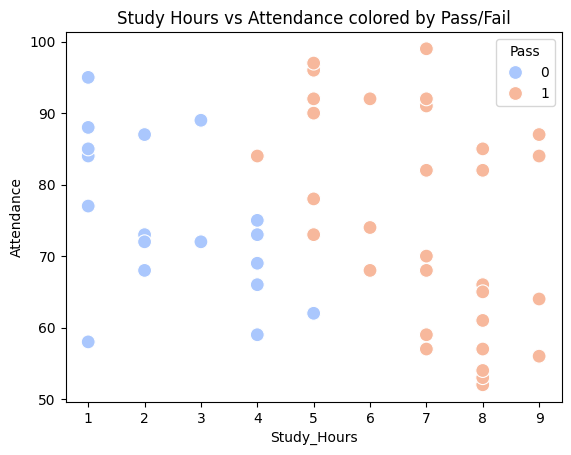

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Study_Hours',y='Attendance',hue='Pass',data=df, palette='coolwarm', s=100)
plt.title('Study Hours vs Attendance colored by Pass/Fail')
plt.show()

**Prepare data for model**


*   Features(X):Study_Hours,Attendnace
*   Target(Y):Pass(0 or 1)






In [ ]:
from sklearn.model_selection import train_test_split

X=df[['Study_Hours','Attendance']]
y=df['Pass']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=12)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

Make predictions

.predict() gives binary output like 0 or 1

.predict_proba() gives the probabilty of each class


In [ ]:
y_pred= log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability': y_prob
})

,Actual,Predicted,Probability
28,1,1,0.748978
46,0,0,0.277775
7,1,1,0.882012
41,1,1,0.998282
36,1,1,0.968665
29,1,1,0.514432
21,0,0,0.041355
48,1,1,0.994583
19,1,1,0.611341
8,0,0,0.040485


In [ ]:
df.head()

,Study_Hours,Attendance,Pass
0,1,88,0
1,7,59,1
2,6,68,1
3,4,73,0
4,4,75,0


In [ ]:
#new student data
new_Student=np.array([[9,25]]) #Must be 2D:[[Study_Hours, Attendance]]

In [ ]:
#Predict pass/fail
pred_class=log_reg.predict(new_Student)
print(f"Predicted Class (0=Fail, 1=Pass):{pred_class[0]}")

Predicted Class (0=Fail, 1=Pass):1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#predict probability of passing
pred_prob=log_reg.predict_proba(new_Student)[0][1]
print(f"Probability of Passing:{pred_prob:.2f}")

Probability of Passing:0.82


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[6 0]
 [0 9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



**Manually**

In [ ]:
#Step 1:Select data points
study=8
attendance=0
print(f"Data point -> Study Hours= {study}, Attendance={attendance}")

Data point -> Study Hours= 8, Attendance=0


In [ ]:
#Step 2:Get Model Parameters
b0=log_reg.intercept_[0]
b1,b2=log_reg.coef_[0]

print(f"Intercept(b0):{b0:.4f}")
print(f"coeff for study hours (b1):{b1:.4f}")
print(f"coeff for attendance (b2):{b2:.4f}")

Intercept(b0):-17.9126
coeff for study hours (b1):1.8037
coeff for attendance (b2):0.1280


In [ ]:
#Step 3: Compute Linear combination
z=b0+(b1*study)+(b2*attendance)
print(f"Linear Combination(z):{z:.4f}")

Linear Combination(z):-3.4832


In [ ]:
#Step 4: Apply sigmoid function
y_prob=1/(1+np.exp(-z))
print(f"Predicted probabbility of passing:{y_prob:.4f}")

Predicted probabbility of passing:0.0298


In [ ]:
#Step 5: Interpret Probability
if y_prob>0.5:
  print("Predicted Class: Pass")
else:
  print("Predicted Class: Fail")

Predicted Class: Fail
